<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [9]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])


In [19]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [11]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [12]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

In [21]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### q2.1 For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Owner-occupied homes')

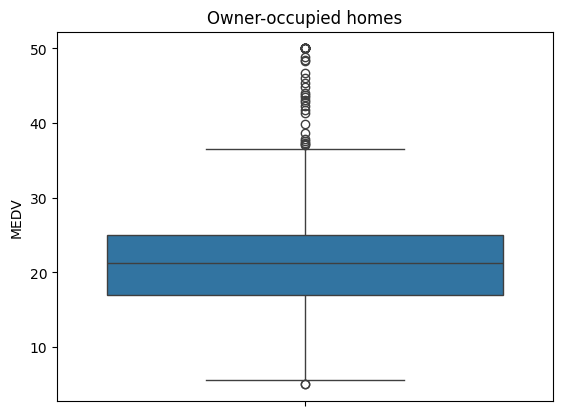

In [24]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set_title('Owner-occupied homes')

### q2.2 Provide a bar plot for the Charles river variable

Text(0.5, 1.0, 'Charles River dummy variable')

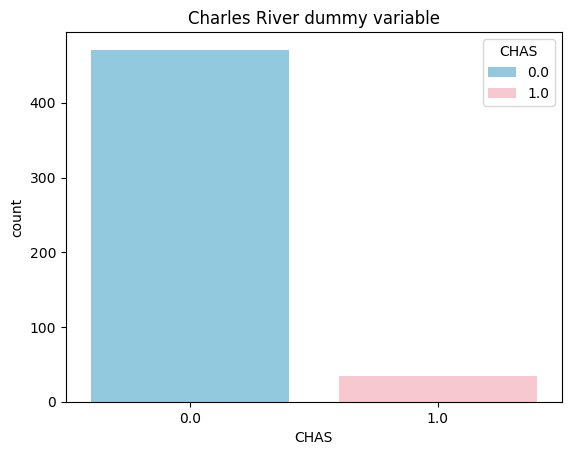

In [41]:
ax = sns.countplot(x = 'CHAS', hue='CHAS', data = boston_df, palette=['skyblue', 'pink'])
ax.set_title('Charles River dummy variable')

### q2.3 Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

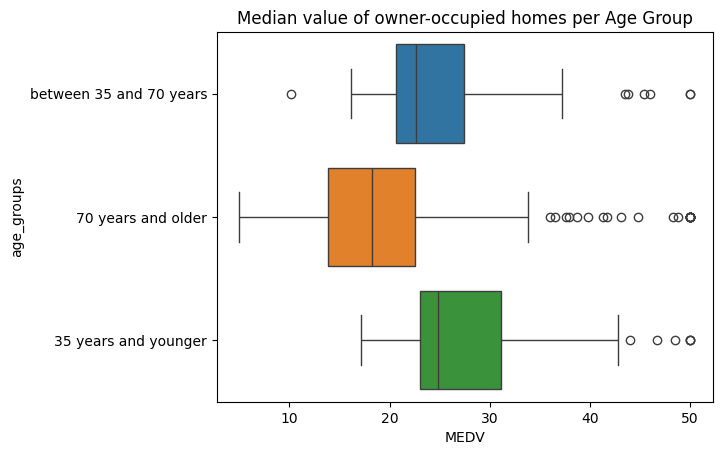

In [48]:
boston_df.loc[(boston_df['AGE'] <= 35),'age_groups'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] <= 70),'age_groups'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70),'age_groups'] = '70 years and older'

ax = sns.boxplot(x = 'MEDV', y = 'age_groups', data = boston_df,hue='age_groups')
ax.set_title('Median value of owner-occupied homes per Age Group')

### q2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')

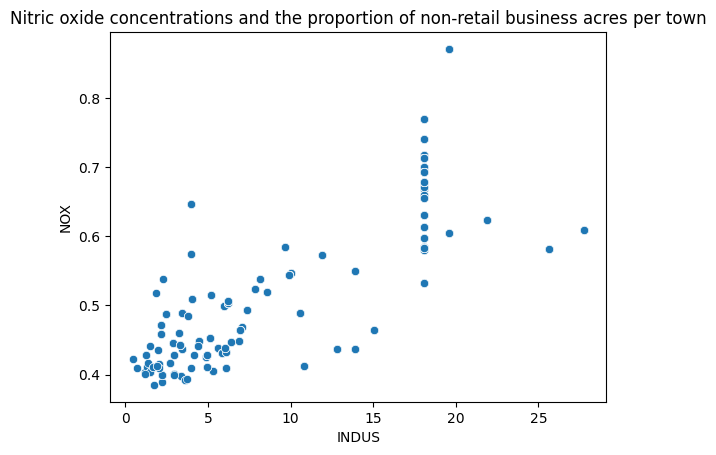

In [49]:
ax = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax.set_title('Nitric oxide concentrations and the proportion of non-retail business acres per town')

### q2.5 Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

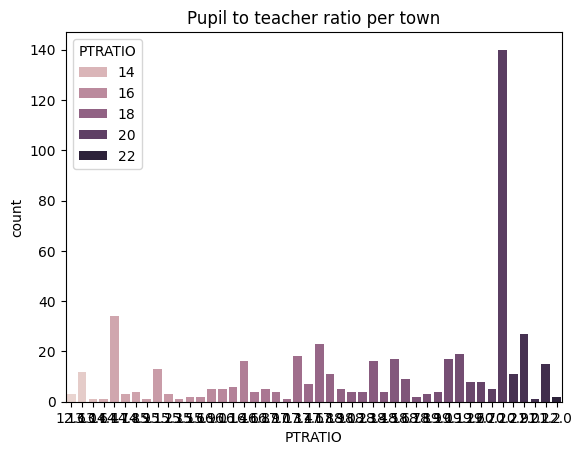

In [57]:
ax=sns.countplot(x='PTRATIO', hue = 'PTRATIO',data=boston_df)
ax.set_title('Pupil to teacher ratio per town')

## Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.



### q3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

 State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is a no significant difference in median value of houses bounded by the Charles river")
* $H_1: µ_1 ≠ µ_2$ ("there is a significant difference in median value of houses bounded by the Charles river")


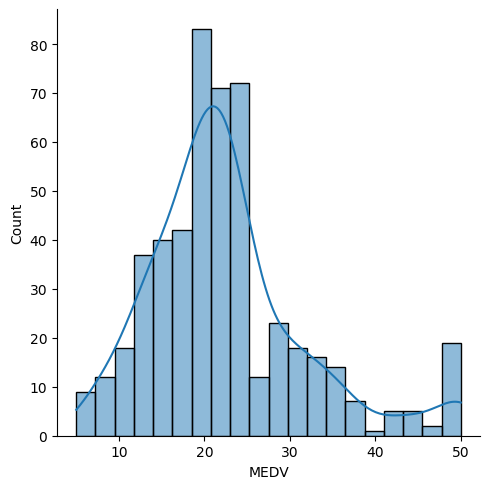

<class 'AttributeError'>: 'AxesSubplot' object has no property 'xlable'

In [62]:
ax = sns.displot(boston_df['MEDV'], 
                 bins = 20, kde = True)
ax.set(xlable = 'Normal Distribution', ylable = 'Frequency')

In [76]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS'] = 'tract bounds'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS'] = 'other'

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 'tract bounds']['MEDV'], 
                      boston_df[boston_df['CHAS'] == 'other']['MEDV'], equal_var = True)


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

p-value < 0.05, we reject the Null Hypothesis, there is a no significant difference in median value of houses bounded by the Charles river


### q3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

 State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ ("the three porportion median are equal")
* $H_1:$ At least one of the median differ

In [86]:
scipy.stats.levene(boston_df[boston_df['age_groups'] == '35 years and younger']['MEDV'], 
                      boston_df[boston_df['age_groups'] == 'between 35 and 70 years']['MEDV'], 
                      boston_df[boston_df['age_groups'] == '70 years and older']['MEDV'],center = 'median')

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

p-value < 0.05, we reject the Null Hypothesis as there is no difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

### q3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis
* $H_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
* $H_1:$ there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [90]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

p-value < 0.05, we reject the Null Hypothesis as there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### q3.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [92]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        15:50:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The low R-squared value suggests that this variable alone may not be a strong predictor of home values, and there may be other factors not accounted for in the model that influence home prices in Boston